# <font color='green'>Data Science Academy</font>
# <font color='green'>Curso Bônus - E-Gov Analytics</font>

## <font color='green'>Projeto E-Gov Analytics</font>
## <font color='green'>Como Aumento do PIB e Gastos do Governo Impactam os Setores de Saúde e Educação</font>

![title](imagens/projeto.png)

## Definição do Problema

O papel do governo no crescimento econômico tem sido um problema desde há muito
tempo, com a percepção de que, para um desenvolvimento sustentável e uma produção
eficiente, o papel do governo nas políticas econômicas deve ser reduzido.
Dado este cenário fiscal, é necessário identificar a relação entre o PIB (Produto Interno
Bruto) e as despesas do governo nos setores de saúde e educação e como se relacionam com o
crescimento do PIB na economia de um país.
Para este trabalho não vamos considerar um país específico a fim de evitar qualquer
tipo de polêmica ou viés. Nosso objetivo aqui é estudar e aplicar análise de dados. Portanto,
este projeto se aplica a qualquer país.
Principais objetivos:

1. Em que ano o país teve um alto crescimento do PIB Per Capita?

2. Qual ano teve as maiores despesas com saúde?

3. Qual ano teve os maiores gastos com educação?

4. Como a receita do governo se correlaciona com a despesa do governo?

5. Como a educação e a saúde se correlacionam com o crescimento do PIB?

6. Como os gastos do governo com educação e saúde afetam o crescimento do PIB?

7. Com base na análise quais são as recomendações aos governantes e gestores?

## Fonte de Dados

Leia o manual em pdf no curso bônus de E-Gov Analytics.

Para este trabalho usamos como fonte de dados a API fornecida pelo Banco Mundial no
endereço abaixo: 

http://api.worldbank.org/v2/en/country

A API permite extrair dados de diversos países simplesmente colocando o código do país ao final do endereço acima.
Extraímos dados de um dos países no período de 2003 a 2019 e ajustamos os nomes das colunas. Nosso objetivo aqui é estudar análise de dados e o processo a seguir no curso poderá ser aplicado a qualquer país. O dataset e o dicionário de dados serão fornecidos a você. 

O repositório de dados abertos do Banco Mundial oferece fonte valiosa de dados ao redor do mundo:

https://data.worldbank.org/

## Dicionário de Dados


**Variável Descrição**

- ano_coleta =  Ano da coleta dos dados


- despesas_educ_percent = Despesas com educação secundária como uma porcentagem das despesas do governo


- despesas_saude_per_capita = Despesas atuais com saúde per capita na taxa atual em dólares dos EUA


- despesas_educ_total = Despesas do governo com educação, total como uma porcentagem das despesas do governo


- despesas_saude_%pib = Despesas atuais com saúde como uma porcentagem do PIB


- receita_trib_%pib = Receita tributária como porcentagem do PIB


- receita_excl_doa_%pib = Receita excluindo doações como porcentagem do PIB



- ibrd_e_ida = Empréstimos do BIRD e créditos da AID como DOD, US atuais


- pop_cresc_anual% = Crescimento populacional como porcentagem anual


- pib_cresc_per_capita_%pib = Crescimento do PIB per capita como porcentagem anual pib_deflator Deflator do PIB, ano base varia por país


- domestic_saude_despesas_%pib = Despesas domésticas do governo geral com saúde como uma porcentagem do PIB


- pib_cresc_anual% = Crescimento do PIB como uma porcentagem anual


- pib_cor_us PIB em US correntes


- despesa_nac_bruta_% = pib Despesa nacional bruta como uma porcentagem do PIB pib_moeda_local PIB em moeda local

## Instalando e Carregando os Pacotes

In [1]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# !pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
#!pip install -q -U watermark

In [117]:
# Imports

# Importando bibliotecas de manipulação dados
import numpy as np
import pandas as pd

# Importando bibliotecas de visualização de dados
import matplotlib.pyplot as plt
import seaborn as sb

# Importando bibliotecas de modelo regressão linear
import sklearn
from sklearn.linear_model import LinearRegression

# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Rafael Gallo - Bibliotecas geral" --iversions

Author: Rafael Gallo - Bibliotecas geral

pandas    : 1.5.3
seaborn   : 0.12.2
matplotlib: 3.7.1
sklearn   : 0.0.post5
numpy     : 1.23.5



## Carregando e Compreendendo os Dados

In [3]:
# Carrega o dataset
df = pd.read_excel('dados/dataset.xlsx')

In [4]:
# Visualizando dados geral
df.head()

,ano_coleta,despesas_educ_percent,despesas_saude_per_capita,despesas_educ_total,despesas_saude_%pib,receita_trib_%pib,receita_excl_doa_%pib,ibrd_e_ida,pop_cresc_anual%,pib_cresc_per_capita_%pib,pib_deflator,domestic_saude_despesas_%pib,pib_cresc_anual%,pib_cor_us$,despesa_nac_bruta_%pib,pib_moeda_local
0,2003,20.85074,25.437891,24.98009,5.169123,NaN,NaN,2.741964e+09,2.709600,0.180864,51.824235,1.488423,2.932476,1.490452e+10,111.732648,1131782000000
1,2004,23.40954,27.526983,26.66815,5.344949,NaN,NaN,2.882726e+09,2.720796,2.283178,55.517666,1.416008,5.104300,1.609534e+10,110.347249,1274329000000
2,2005,NaN,30.960957,27.46934,5.314364,NaN,NaN,2.663224e+09,2.739229,3.045012,58.237838,1.482691,5.906666,1.873790e+10,110.429285,1415725000000
3,2006,21.67777,40.938290,25.08140,5.873449,NaN,NaN,2.764089e+09,2.757907,3.576204,71.941278,1.458456,6.472494,2.582552e+10,109.212364,1862041000000
4,2007,NaN,50.321873,NaN,5.997067,NaN,NaN,2.968119e+09,2.768560,3.933078,77.789734,1.556385,6.850730,3.195820e+10,109.941251,2151349000000


In [5]:
# Shape
df.shape

(17, 16)

# Análise Exploratória

In [6]:
# Tipos de dados
df.dtypes

ano_coleta                        int64
despesas_educ_percent           float64
despesas_saude_per_capita       float64
despesas_educ_total             float64
despesas_saude_%pib             float64
receita_trib_%pib               float64
receita_excl_doa_%pib           float64
ibrd_e_ida                      float64
pop_cresc_anual%                float64
pib_cresc_per_capita_%pib       float64
pib_deflator                    float64
domestic_saude_despesas_%pib    float64
pib_cresc_anual%                float64
pib_cor_us$                     float64
despesa_nac_bruta_%pib          float64
pib_moeda_local                   int64
dtype: object

In [7]:
# Resumo estatístico
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ano_coleta,17.0,2.011000e+03,5.049752e+00,2.003000e+03,2.007000e+03,2.011000e+03,2.015000e+03,2.019000e+03
despesas_educ_percent,8.0,3.477660e+01,1.063214e+01,2.085074e+01,2.297660e+01,4.176341e+01,4.268256e+01,4.312418e+01
despesas_saude_per_capita,15.0,5.526504e+01,1.707770e+01,2.543789e+01,4.563008e+01,5.738742e+01,6.928248e+01,7.661032e+01
despesas_educ_total,13.0,2.084464e+01,3.828826e+00,1.666466e+01,1.770870e+01,1.925283e+01,2.498009e+01,2.746934e+01
despesas_saude_%pib,15.0,5.555868e+00,4.121436e-01,4.802543e+00,5.266875e+00,5.519421e+00,5.935258e+00,6.116753e+00
receita_trib_%pib,5.0,1.600802e+01,6.775789e-01,1.508514e+01,1.563783e+01,1.618353e+01,1.625664e+01,1.687698e+01
receita_excl_doa_%pib,5.0,2.102866e+01,9.446771e-01,1.962042e+01,2.061619e+01,2.119959e+01,2.173891e+01,2.196819e+01
ibrd_e_ida,16.0,3.667159e+09,9.532678e+08,2.663224e+09,2.946771e+09,3.313021e+09,4.244785e+09,5.801797e+09
pop_cresc_anual%,17.0,2.606996e+00,1.724616e-01,2.271902e+00,2.491937e+00,2.693733e+00,2.739229e+00,2.768560e+00
pib_cresc_per_capita_%pib,17.0,2.539702e+00,1.798253e+00,-2.503373e+00,2.283178e+00,3.045012e+00,3.346252e+00,5.494077e+00


In [8]:
# Resumo estatístico
df.describe()

,ano_coleta,despesas_educ_percent,despesas_saude_per_capita,despesas_educ_total,despesas_saude_%pib,receita_trib_%pib,receita_excl_doa_%pib,ibrd_e_ida,pop_cresc_anual%,pib_cresc_per_capita_%pib,pib_deflator,domestic_saude_despesas_%pib,pib_cresc_anual%,pib_cor_us$,despesa_nac_bruta_%pib,pib_moeda_local
count,17.000000,8.000000,15.000000,13.000000,15.000000,5.000000,5.000000,1.600000e+01,17.000000,17.000000,17.000000,15.000000,17.000000,1.700000e+01,17.000000,1.700000e+01
mean,2011.000000,34.776599,55.265036,20.844645,5.555868,16.008023,21.028661,3.667159e+09,2.606996,2.539702,117.186747,1.754343,5.247425,4.851720e+10,112.318030,4.387753e+12
std,5.049752,10.632141,17.077696,3.828826,0.412144,0.677579,0.944677,9.532678e+08,0.172462,1.798253,46.934509,0.249802,1.809246,2.477595e+10,2.112360,2.776122e+12
min,2003.000000,20.850740,25.437891,16.664660,4.802543,15.085142,19.620423,2.663224e+09,2.271902,-2.503373,51.824235,1.416008,0.232283,1.490452e+10,109.212364,1.131782e+12
25%,2007.000000,22.976598,45.630081,17.708700,5.266875,15.637825,20.616187,2.946771e+09,2.491937,2.283178,77.789734,1.522404,4.805697,3.195820e+10,110.429285,2.151349e+12
50%,2011.000000,41.763410,57.387424,19.252830,5.519421,16.183533,21.199592,3.313021e+09,2.693733,3.045012,113.111372,1.771546,5.718507,4.195343e+10,112.164729,3.725918e+12
75%,2015.000000,42.682555,69.282478,24.980090,5.935258,16.256635,21.738908,4.244785e+09,2.739229,3.346252,154.710423,1.950641,6.108264,6.400775e+10,114.066709,6.284185e+12
max,2019.000000,43.124180,76.610321,27.469340,6.116753,16.876979,21.968194,5.801797e+09,2.768560,5.494077,192.904792,2.148430,8.405699,9.550309e+10,116.218812,9.740360e+12


In [9]:
# Verificando valores ausentes
df.isnull().sum()

ano_coleta                       0
despesas_educ_percent            9
despesas_saude_per_capita        2
despesas_educ_total              4
despesas_saude_%pib              2
receita_trib_%pib               12
receita_excl_doa_%pib           12
ibrd_e_ida                       1
pop_cresc_anual%                 0
pib_cresc_per_capita_%pib        0
pib_deflator                     0
domestic_saude_despesas_%pib     2
pib_cresc_anual%                 0
pib_cor_us$                      0
despesa_nac_bruta_%pib           0
pib_moeda_local                  0
dtype: int64

## Limpeza e Processamento dos Dados

O que fazer nesta etapa?

### Tratamento de Valores Ausentes com Backfilling e Interpolação

In [10]:
# Limpando valores ausentes através de backfilling e interpolação
# Limpando valores ausentes através de backfilling e interpolação
df['receita_trib_%pib'].fillna(method = 'bfill', inplace = True)
df['receita_excl_doa_%pib'].fillna(method = 'bfill', inplace = True)
df = df.interpolate()
df

,ano_coleta,despesas_educ_percent,despesas_saude_per_capita,despesas_educ_total,despesas_saude_%pib,receita_trib_%pib,receita_excl_doa_%pib,ibrd_e_ida,pop_cresc_anual%,pib_cresc_per_capita_%pib,pib_deflator,domestic_saude_despesas_%pib,pib_cresc_anual%,pib_cor_us$,despesa_nac_bruta_%pib,pib_moeda_local
0,2003,20.850740,25.437891,24.980090,5.169123,16.876979,21.738908,2.741964e+09,2.709600,0.180864,51.824235,1.488423,2.932476,1.490452e+10,111.732648,1131782000000
1,2004,23.409540,27.526983,26.668150,5.344949,16.876979,21.738908,2.882726e+09,2.720796,2.283178,55.517666,1.416008,5.104300,1.609534e+10,110.347249,1274329000000
2,2005,22.543655,30.960957,27.469340,5.314364,16.876979,21.738908,2.663224e+09,2.739229,3.045012,58.237838,1.482691,5.906666,1.873790e+10,110.429285,1415725000000
3,2006,21.677770,40.938290,25.081400,5.873449,16.876979,21.738908,2.764089e+09,2.757907,3.576204,71.941278,1.458456,6.472494,2.582552e+10,109.212364,1862041000000
4,2007,25.852864,50.321873,23.950048,5.997067,16.876979,21.738908,2.968119e+09,2.768560,3.933078,77.789734,1.556385,6.850730,3.195820e+10,109.941251,2151349000000
5,2008,30.027958,55.471077,22.818695,6.049852,16.876979,21.738908,3.050475e+09,2.767254,-2.503373,89.575793,1.638045,0.232283,3.589515e+10,110.614251,2483058000000
6,2009,34.203052,55.460743,21.687342,6.027803,16.876979,21.738908,3.156096e+09,2.750847,0.503855,100.000000,1.680606,3.306940,3.702151e+10,110.798383,2863688000000
7,2010,38.378146,59.169811,20.555990,6.116753,16.876979,21.738908,3.237614e+09,2.722586,5.494077,102.091676,1.771546,8.405699,4.000009e+10,112.164729,3169335000000
8,2011,42.553240,57.387424,19.252830,5.811701,16.876979,21.738908,3.388428e+09,2.693733,3.288145,113.111372,1.793809,6.108264,4.195343e+10,114.523186,3725918000000
9,2012,41.763150,64.839363,19.923900,5.613697,16.876979,21.738908,3.585785e+09,2.662705,1.815740,123.720970,1.819278,4.563209,5.041275e+10,114.066709,4261370003300


In [11]:
# Verificando valores ausentes
df.isnull().sum()

ano_coleta                      0
despesas_educ_percent           0
despesas_saude_per_capita       0
despesas_educ_total             0
despesas_saude_%pib             0
receita_trib_%pib               0
receita_excl_doa_%pib           0
ibrd_e_ida                      0
pop_cresc_anual%                0
pib_cresc_per_capita_%pib       0
pib_deflator                    0
domestic_saude_despesas_%pib    0
pib_cresc_anual%                0
pib_cor_us$                     0
despesa_nac_bruta_%pib          0
pib_moeda_local                 0
dtype: int64

In [12]:
# Shape
df.shape

(17, 16)

In [13]:
# Vamos remover a coluna gdp em US$ uma vez que já o temos na moeda local.
df = df.drop(columns = ['pib_cor_us$'])

In [14]:
# Shape
df.shape

(17, 15)

In [15]:
# Arrendodamos os valores das colunas decimais para 4 casas decimais
df = df.round(4)

In [16]:
# Visualiza os dados
df.head()

,ano_coleta,despesas_educ_percent,despesas_saude_per_capita,despesas_educ_total,despesas_saude_%pib,receita_trib_%pib,receita_excl_doa_%pib,ibrd_e_ida,pop_cresc_anual%,pib_cresc_per_capita_%pib,pib_deflator,domestic_saude_despesas_%pib,pib_cresc_anual%,despesa_nac_bruta_%pib,pib_moeda_local
0,2003,20.8507,25.4379,24.9801,5.1691,16.877,21.7389,2.741964e+09,2.7096,0.1809,51.8242,1.4884,2.9325,111.7326,1131782000000
1,2004,23.4095,27.5270,26.6682,5.3449,16.877,21.7389,2.882726e+09,2.7208,2.2832,55.5177,1.4160,5.1043,110.3472,1274329000000
2,2005,22.5437,30.9610,27.4693,5.3144,16.877,21.7389,2.663224e+09,2.7392,3.0450,58.2378,1.4827,5.9067,110.4293,1415725000000
3,2006,21.6778,40.9383,25.0814,5.8734,16.877,21.7389,2.764089e+09,2.7579,3.5762,71.9413,1.4585,6.4725,109.2124,1862041000000
4,2007,25.8529,50.3219,23.9500,5.9971,16.877,21.7389,2.968119e+09,2.7686,3.9331,77.7897,1.5564,6.8507,109.9413,2151349000000


In [17]:
# Salvamos o dataset limpo
df.to_csv('dados/df_limpo.csv', index = False)

# Part 1 - Análise de dados

In [18]:
import seaborn as sns

In [19]:
# Carregando o dataset limpo
data = pd.read_csv('dados/df_limpo.csv')

In [20]:
# Visualiza os dados
data.head()

,ano_coleta,despesas_educ_percent,despesas_saude_per_capita,despesas_educ_total,despesas_saude_%pib,receita_trib_%pib,receita_excl_doa_%pib,ibrd_e_ida,pop_cresc_anual%,pib_cresc_per_capita_%pib,pib_deflator,domestic_saude_despesas_%pib,pib_cresc_anual%,despesa_nac_bruta_%pib,pib_moeda_local
0,2003,20.8507,25.4379,24.9801,5.1691,16.877,21.7389,2.741964e+09,2.7096,0.1809,51.8242,1.4884,2.9325,111.7326,1131782000000
1,2004,23.4095,27.5270,26.6682,5.3449,16.877,21.7389,2.882726e+09,2.7208,2.2832,55.5177,1.4160,5.1043,110.3472,1274329000000
2,2005,22.5437,30.9610,27.4693,5.3144,16.877,21.7389,2.663224e+09,2.7392,3.0450,58.2378,1.4827,5.9067,110.4293,1415725000000
3,2006,21.6778,40.9383,25.0814,5.8734,16.877,21.7389,2.764089e+09,2.7579,3.5762,71.9413,1.4585,6.4725,109.2124,1862041000000
4,2007,25.8529,50.3219,23.9500,5.9971,16.877,21.7389,2.968119e+09,2.7686,3.9331,77.7897,1.5564,6.8507,109.9413,2151349000000


## <font color = "green">1- Em Que Ano o País Teve um Alto Crescimento do PIB Per Capita?</font>

<Axes: xlabel='ano_coleta', ylabel='pib_cresc_per_capita_%pib'>

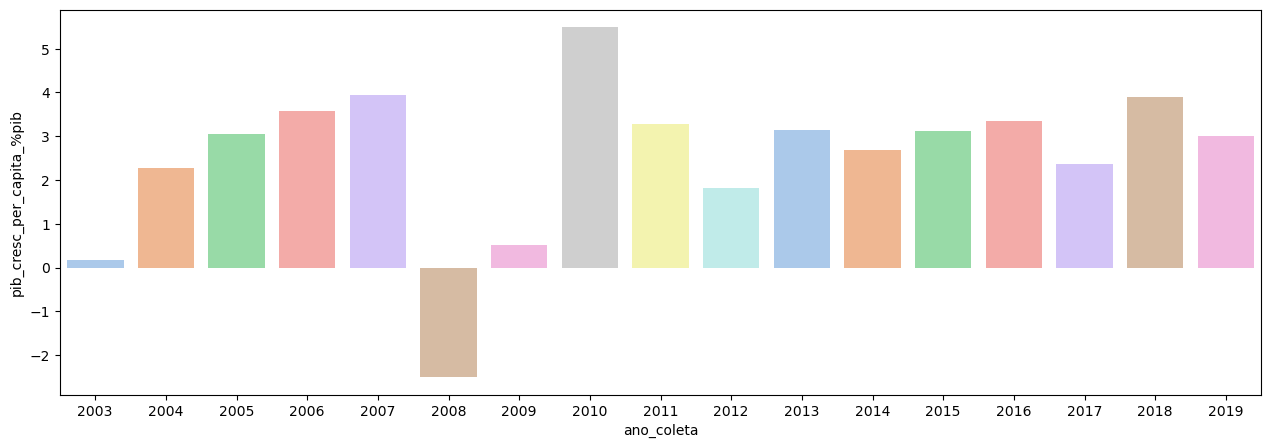

In [21]:
plt.figure(figsize=(15.5, 5))
sns.barplot(data=data, x="ano_coleta", y="pib_cresc_per_capita_%pib", palette='pastel')

**Resposta:** Pelo gráfico acima vemos que foi no ano de 2010 o maior crescimento do PIB Per Capita no período analisado.

## <font color = "green">2- Qual Ano Teve as Maiores Despesas com Saúde?</font>

In [22]:
# Calculando o gasto nacional bruto em relação ao PIB na moeda local
data['gasto_nac_bruto'] = data["despesa_nac_bruta_%pib"] / 100 * data["pib_moeda_local"]

In [29]:
# Calculamos o gasto total em saúde e criamos uma nova variável
data["gasto_saude"] = data["domestic_saude_despesas_%pib"] / 100 * data["gasto_nac_bruto"]
data.head()

,ano_coleta,despesas_educ_percent,despesas_saude_per_capita,despesas_educ_total,despesas_saude_%pib,receita_trib_%pib,receita_excl_doa_%pib,ibrd_e_ida,pop_cresc_anual%,pib_cresc_per_capita_%pib,pib_deflator,domestic_saude_despesas_%pib,pib_cresc_anual%,despesa_nac_bruta_%pib,pib_moeda_local,gasto_nac_bruto,gasto_educ,gasto_saude
0,2003,20.8507,25.4379,24.9801,5.1691,16.877,21.7389,2.741964e+09,2.7096,0.1809,51.8242,1.4884,2.9325,111.7326,1131782000000,1.264569e+12,3.158907e+11,1.882185e+10
1,2004,23.4095,27.5270,26.6682,5.3449,16.877,21.7389,2.882726e+09,2.7208,2.2832,55.5177,1.4160,5.1043,110.3472,1274329000000,1.406186e+12,3.750046e+11,1.991160e+10
2,2005,22.5437,30.9610,27.4693,5.3144,16.877,21.7389,2.663224e+09,2.7392,3.0450,58.2378,1.4827,5.9067,110.4293,1415725000000,1.563375e+12,4.294482e+11,2.318016e+10
3,2006,21.6778,40.9383,25.0814,5.8734,16.877,21.7389,2.764089e+09,2.7579,3.5762,71.9413,1.4585,6.4725,109.2124,1862041000000,2.033580e+12,5.100503e+11,2.965976e+10
4,2007,25.8529,50.3219,23.9500,5.9971,16.877,21.7389,2.968119e+09,2.7686,3.9331,77.7897,1.5564,6.8507,109.9413,2151349000000,2.365221e+12,5.664704e+11,3.681230e+10


<Axes: xlabel='ano_coleta'>

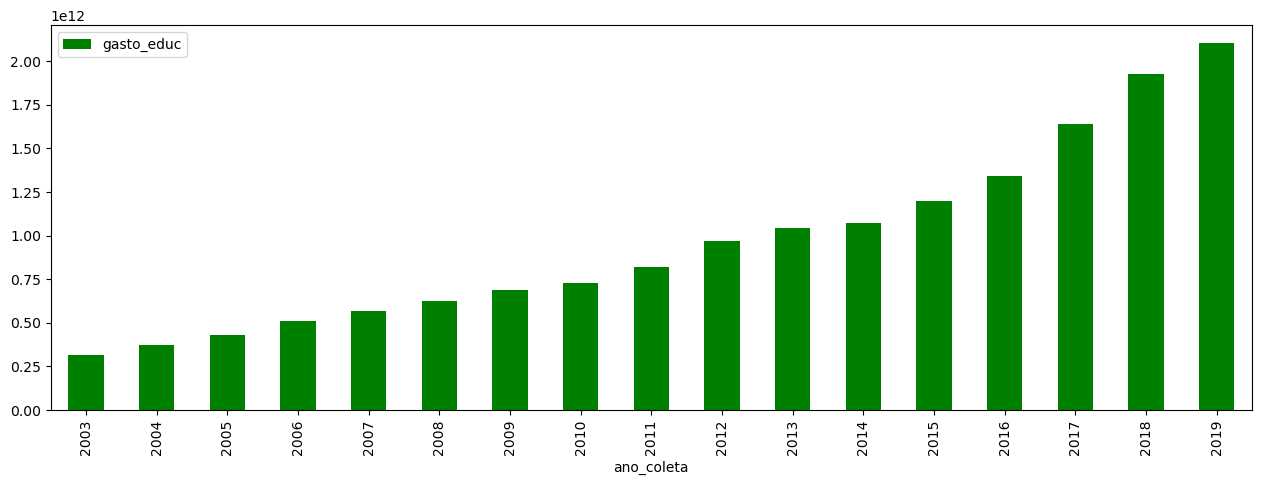

In [31]:
# Agora respondemos a pergunta
data.plot(x = "ano_coleta", 
        y = ["gasto_educ"], 
        kind = "bar", 
        figsize = (15.5,5), 
        color = 'green')

Resposta: 2019 foi o ano com maior volume de gastos em saúde.

## <font color = "green">3- Qual Ano Teve os Maiores Gastos com Educação?</font>

In [32]:
# Visualiza os dados
data.head()

,ano_coleta,despesas_educ_percent,despesas_saude_per_capita,despesas_educ_total,despesas_saude_%pib,receita_trib_%pib,receita_excl_doa_%pib,ibrd_e_ida,pop_cresc_anual%,pib_cresc_per_capita_%pib,pib_deflator,domestic_saude_despesas_%pib,pib_cresc_anual%,despesa_nac_bruta_%pib,pib_moeda_local,gasto_nac_bruto,gasto_educ,gasto_saude
0,2003,20.8507,25.4379,24.9801,5.1691,16.877,21.7389,2.741964e+09,2.7096,0.1809,51.8242,1.4884,2.9325,111.7326,1131782000000,1.264569e+12,3.158907e+11,1.882185e+10
1,2004,23.4095,27.5270,26.6682,5.3449,16.877,21.7389,2.882726e+09,2.7208,2.2832,55.5177,1.4160,5.1043,110.3472,1274329000000,1.406186e+12,3.750046e+11,1.991160e+10
2,2005,22.5437,30.9610,27.4693,5.3144,16.877,21.7389,2.663224e+09,2.7392,3.0450,58.2378,1.4827,5.9067,110.4293,1415725000000,1.563375e+12,4.294482e+11,2.318016e+10
3,2006,21.6778,40.9383,25.0814,5.8734,16.877,21.7389,2.764089e+09,2.7579,3.5762,71.9413,1.4585,6.4725,109.2124,1862041000000,2.033580e+12,5.100503e+11,2.965976e+10
4,2007,25.8529,50.3219,23.9500,5.9971,16.877,21.7389,2.968119e+09,2.7686,3.9331,77.7897,1.5564,6.8507,109.9413,2151349000000,2.365221e+12,5.664704e+11,3.681230e+10


In [33]:
# Calculamos o gasto em educação e criamos uma variável
data["gasto_educ"] = data["despesas_educ_total"] / 100 * data["gasto_nac_bruto"]
data.head()

,ano_coleta,despesas_educ_percent,despesas_saude_per_capita,despesas_educ_total,despesas_saude_%pib,receita_trib_%pib,receita_excl_doa_%pib,ibrd_e_ida,pop_cresc_anual%,pib_cresc_per_capita_%pib,pib_deflator,domestic_saude_despesas_%pib,pib_cresc_anual%,despesa_nac_bruta_%pib,pib_moeda_local,gasto_nac_bruto,gasto_educ,gasto_saude
0,2003,20.8507,25.4379,24.9801,5.1691,16.877,21.7389,2.741964e+09,2.7096,0.1809,51.8242,1.4884,2.9325,111.7326,1131782000000,1.264569e+12,3.158907e+11,1.882185e+10
1,2004,23.4095,27.5270,26.6682,5.3449,16.877,21.7389,2.882726e+09,2.7208,2.2832,55.5177,1.4160,5.1043,110.3472,1274329000000,1.406186e+12,3.750046e+11,1.991160e+10
2,2005,22.5437,30.9610,27.4693,5.3144,16.877,21.7389,2.663224e+09,2.7392,3.0450,58.2378,1.4827,5.9067,110.4293,1415725000000,1.563375e+12,4.294482e+11,2.318016e+10
3,2006,21.6778,40.9383,25.0814,5.8734,16.877,21.7389,2.764089e+09,2.7579,3.5762,71.9413,1.4585,6.4725,109.2124,1862041000000,2.033580e+12,5.100503e+11,2.965976e+10
4,2007,25.8529,50.3219,23.9500,5.9971,16.877,21.7389,2.968119e+09,2.7686,3.9331,77.7897,1.5564,6.8507,109.9413,2151349000000,2.365221e+12,5.664704e+11,3.681230e+10


<Axes: xlabel='ano_coleta', ylabel='gasto_saude'>

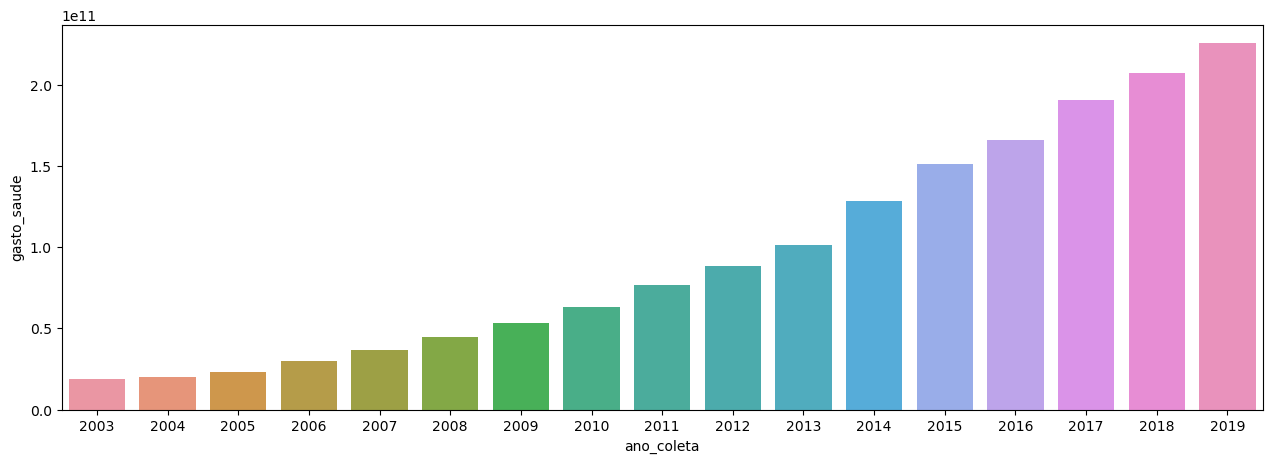

In [37]:
plt.figure(figsize=(15.5, 5))
sns.barplot(x="ano_coleta", y="gasto_saude", data = data)

Resposta: 2019 foi o ano com maior volume de gastos em saúde.

## <font color = "green">4- Como a Receita do Governo se Correlaciona com a Despesa do Governo?</font>

<Axes: >

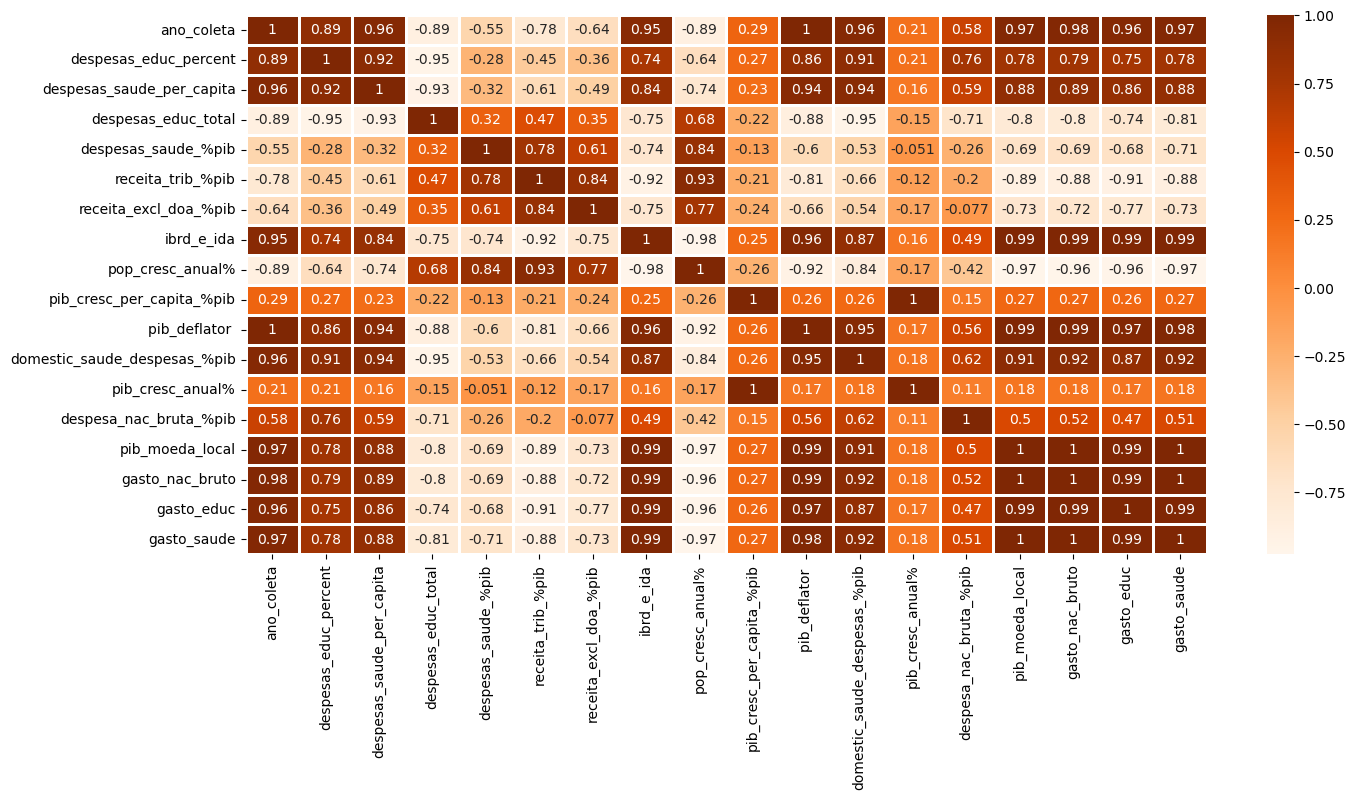

In [41]:
# Calcula a correlação entre as variáveis no conjunto de dados usando o método de Pearson
data2 = data.corr(method = 'pearson')

# Definindo o tamanho do gráfico
plt.figure(figsize = (15.5,7)) 

# Visualiza a correlação em um mapa de calor (heatmap)
# https://matplotlib.org/3.3.0/tutorials/colors/colormaps.html
sb.heatmap(data2, 
           xticklabels = data2.columns,
           yticklabels = data2.columns,
           cmap = 'Oranges',
           annot = True,
           linewidth = 0.8)

A partir dos coeficientes da matriz de correlação acima, obtemos as seguintes informações:

<font color = "blue">Receita de Impostos</font>

* Despesas com saúde (despesas_saude_%pib) tem uma forte correlação com a receita tributária do governo (receita_trib_%pib). O coeficiente de correlação é <font color = "magenta"> + 0,78 </font>, o que indica que eles são diretamente proporcionais.


* Despesas com educação (despesas_educ_total) tem uma boa correlação com a receita tributária (receita_trib_%pib). O coeficiente de correlação é <font color = "magenta"> + 0,47 </font>, o que indica que são diretamente proporcionais, mas não da mesma forma que no setor saúde.

<font color = "blue">Receita de Empréstimos do BIRD e Créditos da AID</font>

* Despesas com saúde (despesas_saude_%pib) tem uma forte correlação com os empréstimos do BIRD e os créditos da AID (ibrd_e_ida). O coeficiente de correlação é <font color = "magenta"> + 0,74 </font>, o que indica que eles são diretamente proporcionais.


* As despesas com educação (despesas_educ_total) têm uma correlação significativamente forte com os empréstimos do BIRD e os créditos da AID (ibrd_e_ida). O coeficiente de correlação é <font color = "magenta"> + 0,75 </font>, o que indica que eles são diretamente proporcionais. Também indica que a educação é principalmente financiada por meio de empréstimos do BIRD e créditos da AID, em oposição à receita fiscal do governo.

## <font color = "green">5 - Como a Educação e a Saúde se Correlacionam com o Crescimento do PIB?</font>

Usando a mesma matriz de correlação do item anterior, podemos concluir o seguinte:

* Despesas com educação (despesas_educ_total) tem uma correlação negativa com o crescimento do PIB per capita (pib_cresc_per_capita_%pib) ao longo dos anos com um coeficiente de <font color = "blue"> - 0,22 </font>. Isso pode ser atribuído principalmente à educação gratuita, portanto, levando a menores gastos com educação por parte dos cidadãos.


* Despesas com saúde (despesas_saude_%pib) também tem uma correlação negativa com o crescimento do PIB per cappita (pib_cresc_per_capita_%pib) em <font color = "blue"> - 0,05 </font>, o que significa que são levemente inversamente proporcionais. Isso se deve aos menores gastos gerais com saúde, principalmente devido aos preços mais baixos - incluindo preços mais baixos de medicamentos e salários mais baixos para médicos e enfermeiras.

## <font color = "green">6 - Como os Gastos do Governo com Educação e Saúde Afetam o Crescimento do PIB?</font>

In [43]:
# Adicionando os gastos de saúde e educação
data['total_gastos_educ_saude'] = data['gasto_educ'] + data['gasto_saude']

<function matplotlib.pyplot.show(close=None, block=None)>

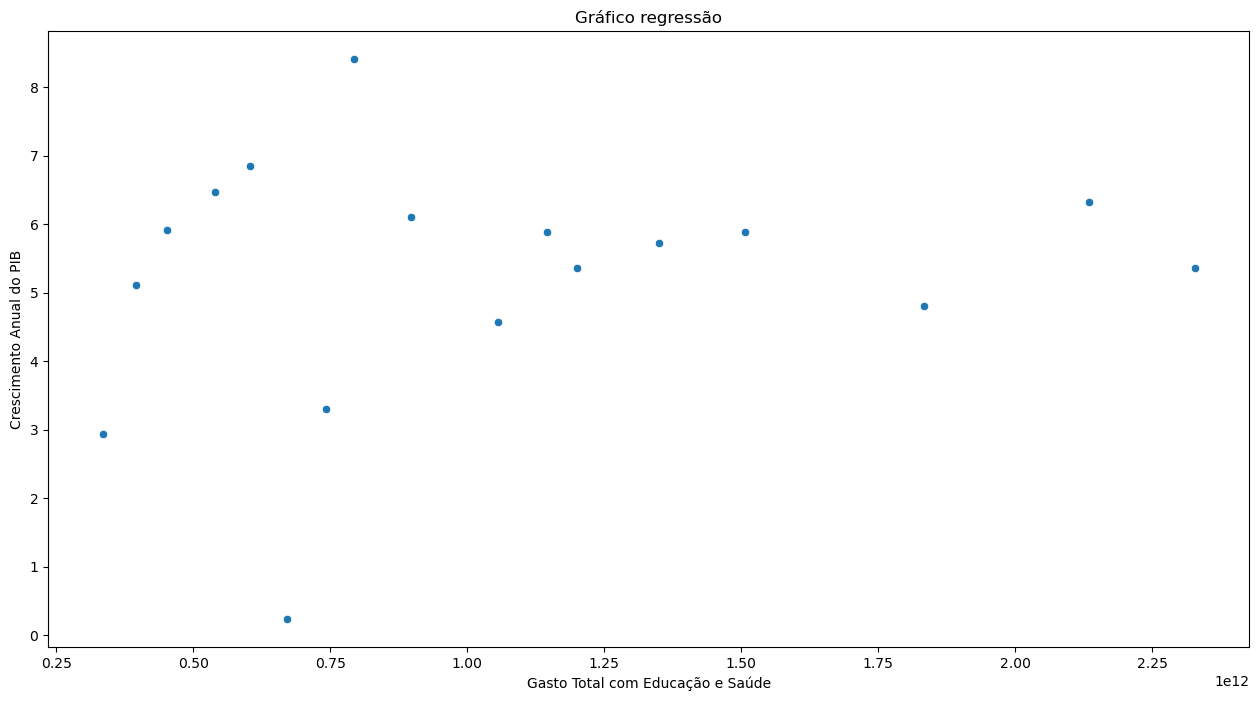

In [53]:
# Definindo o tamanho do gráfico
plt.figure(figsize = (15.5, 8)) 

plt.title("Gráfico regressão")
sns.scatterplot(x="total_gastos_educ_saude", y="pib_cresc_anual%", data = data)
plt.xlabel('Gasto Total com Educação e Saúde')
plt.ylabel('Crescimento Anual do PIB')
plt.show

# Modeo regressão linear

In [54]:
# Prepara x e y
x = pd.DataFrame(data['total_gastos_educ_saude'])
y = pd.DataFrame(data['pib_cresc_anual%'])

In [55]:
# Visualizando dados treino
x.shape

(17, 1)

In [56]:
# Visualizando os dados teste
y.shape

(17, 1)

# Treino e teste

In [60]:
# Importando biblioteca de treino e teste
from sklearn.model_selection import train_test_split

# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [61]:
# Visualizando os dados de treino
X_train.shape

(13, 1)

In [62]:
# Visualizando os dados de teste
y_train.shape

(13, 1)

## Modelo regressão linear 

In [70]:
# Cria e treina o modelo
model_regression_linear = LinearRegression()
model_regression_linear_fit = model_regression_linear.fit(X_train, y_train)
model_regression_linear

LinearRegression()

In [71]:
model_regression_score = model_regression_linear.score(X_train, y_train)
model_regression_score

0.07560278817677402

In [65]:
# Fazendo previsões no conjunto de teste
model_regression_linear_pred = model_regression_linear.predict(X_test)
model_regression_linear_pred

array([[6.21620528],
       [6.17928732],
       [6.00953886],
       [5.1130607 ]])

In [58]:
# Extraindo o coeficiente
model_regression_linear.coef_

array([[5.20791642e-13]])

In [73]:
from sklearn.metrics import mean_squared_error

# Calculando o erro médio quadrado (MSE)
MSE = mean_squared_error(y_test, model_regression_linear_pred)
MSE

11.691972720092993

In [74]:
print("Coeficientes:", model_regression_linear.coef_)
print("Intercept:", model_regression_linear.intercept_)
print("Erro Médio Quadrado (MSE):", MSE)

Coeficientes: [[-6.13218204e-13]]
Intercept: [6.42145712]
Erro Médio Quadrado (MSE): 11.691972720092993


In [95]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error

# Calculando métricas
mae = mean_absolute_error(y_test, model_regression_linear_pred)
rmse = np.sqrt(mean_squared_error(y_test, model_regression_linear_pred))
r2 = r2_score(y_test, model_regression_linear_pred)
rmse = np.sqrt(mean_squared_error(y_test, model_regression_linear_pred))

# Imprimindo métricas
print("Erro Médio Absoluto (MAE):", mae)
print("Raiz Quadrada do Erro Médio Quadrado (RMSE):", rmse)
print("Coeficiente de Determinação (R²):", r2)
print("Raiz Quadrada do Erro Médio Quadrado (RMSE):", rmse)

Erro Médio Absoluto (MAE): 2.8353426893307425
Raiz Quadrada do Erro Médio Quadrado (RMSE): 3.4193526755941677
Coeficiente de Determinação (R²): -1.1822214807620082
Raiz Quadrada do Erro Médio Quadrado (RMSE): 3.4193526755941677


## Modelo 2 - LGBMRegressor

In [85]:
from lightgbm import LGBMRegressor

# Criando o modelo LGBMRegressor
model_LGBMRegressor = LGBMRegressor()

# Treinando o modelo
model_LGBMRegressor_fit = model_LGBMRegressor.fit(X_train, y_train)

model

LGBMRegressor()

In [86]:
# Score modelo
model_LGBMRegressor_score = model_LGBMRegressor.score(X_train, y_train)
model_LGBMRegressor_score

-1.5543122344752192e-15

In [87]:
# Fazendo previsões no conjunto de teste
model_LGBMRegressor_pred = model_LGBMRegressor.predict(X_test)
model_LGBMRegressor_pred

array([5.73989226, 5.73989226, 5.73989226, 5.73989226])

In [97]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculando métricas
mae = mean_absolute_error(y_test, model_LGBMRegressor_pred)
rmse = np.sqrt(mean_squared_error(y_test, model_LGBMRegressor_pred))
r2 = r2_score(y_test, model_LGBMRegressor_pred)
rmse = np.sqrt(mean_squared_error(y_test, model_LGBMRegressor_pred))

# Imprimindo métricas
print("Erro Médio Absoluto (MAE):", mae)
print("Raiz Quadrada do Erro Médio Quadrado (RMSE):", rmse)
print("Coeficiente de Determinação (R²):", r2)
print("Raiz Quadrada do Erro Médio Quadrado (RMSE):", rmse)

Erro Médio Absoluto (MAE): 2.38229613133944
Raiz Quadrada do Erro Médio Quadrado (RMSE): 3.1206485017754972
Coeficiente de Determinação (R²): -0.817610158503159
Raiz Quadrada do Erro Médio Quadrado (RMSE): 3.1206485017754972


In [92]:
# Calculando o erro médio quadrado (MSE)
MSE = mean_squared_error(y_test, model_LGBMRegressor_pred)
print("Erro Médio Quadrado (MSE):", MSE)

Erro Médio Quadrado (MSE): 9.738447071633654


# Modelo 3 - CatBoost Regressor

In [108]:
from catboost import CatBoostRegressor

# Criando o modelo CatBoostRegressor
model_CatBoostRegressor = CatBoostRegressor(iterations=2000, 
                          learning_rate=0.1, 
                          depth=6, 
                          verbose=100)

# Treinando o modelo
model_CatBoostRegressor_fit = model_CatBoostRegressor.fit(X_train, y_train)

# Score modelo
model_CatBoostRegressor_score = model_CatBoostRegressor.score(X_train, y_train)
model_CatBoostRegressor_score

0:	learn: 1.1436709	total: 254us	remaining: 509ms
100:	learn: 0.1961617	total: 24.1ms	remaining: 454ms
200:	learn: 0.0546466	total: 46.2ms	remaining: 414ms
300:	learn: 0.0153436	total: 70.3ms	remaining: 397ms
400:	learn: 0.0042826	total: 97.3ms	remaining: 388ms
500:	learn: 0.0011284	total: 121ms	remaining: 362ms
600:	learn: 0.0003175	total: 147ms	remaining: 343ms
700:	learn: 0.0000876	total: 172ms	remaining: 319ms
800:	learn: 0.0000242	total: 196ms	remaining: 294ms
900:	learn: 0.0000068	total: 222ms	remaining: 271ms
1000:	learn: 0.0000019	total: 251ms	remaining: 251ms
1100:	learn: 0.0000005	total: 279ms	remaining: 228ms
1200:	learn: 0.0000001	total: 302ms	remaining: 201ms
1300:	learn: 0.0000000	total: 329ms	remaining: 177ms
1400:	learn: 0.0000000	total: 355ms	remaining: 152ms
1500:	learn: 0.0000000	total: 380ms	remaining: 126ms
1600:	learn: 0.0000000	total: 403ms	remaining: 100ms
1700:	learn: 0.0000000	total: 427ms	remaining: 75.1ms
1800:	learn: 0.0000000	total: 450ms	remaining: 49.8ms

-24.99999899548936

In [109]:
# Fazendo previsões no conjunto de teste
model_CatBoostRegressor_pred = model_CatBoostRegressor.predict(X_test)
model_CatBoostRegressor_pred

array([5.90670013, 5.90670013, 6.8506999 , 5.36569977])

In [112]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculando métricas
mae = mean_absolute_error(y_test, model_CatBoostRegressor_pred)
rmse = np.sqrt(mean_squared_error(y_test, model_CatBoostRegressor_pred))
r2 = r2_score(y_test, model_CatBoostRegressor_pred)
rmse = np.sqrt(mean_squared_error(y_test, model_CatBoostRegressor_pred))
MSE = mean_squared_error(y_test, model_CatBoostRegressor_pred)

# Imprimindo métricas
print("Erro Médio Quadrado (MSE):", MSE)
print()
print("Erro Médio Absoluto (MAE):", mae)
print()
print("Raiz Quadrada do Erro Médio Quadrado (RMSE):", rmse)
print()
print("Coeficiente de Determinação (R²):", r2)
print()
print("Raiz Quadrada do Erro Médio Quadrado (RMSE):", rmse)

Erro Médio Quadrado (MSE): 13.550189488347003

Erro Médio Absoluto (MAE): 2.8369501005185565

Raiz Quadrada do Erro Médio Quadrado (RMSE): 3.681058202249321

Coeficiente de Determinação (R²): -1.5290440952749003

Raiz Quadrada do Erro Médio Quadrado (RMSE): 3.681058202249321


# Resultados

In [115]:
# Resultados modelos de regressão lineares
r2_model_regression_linear = r2_score(y_test, model_regression_linear_pred)
r2_model_LGBMRegressor = r2_score(y_test, model_LGBMRegressor_pred)
r2_model_CatBoostRegressor = r2_score(y_test, model_CatBoostRegressor_pred)

print("Coeficiente de Determinação - Regression linear (R²):", r2_model_regression_linear)
print("Coeficiente de Determinação - LGBM Regressor (R²):", r2_model_LGBMRegressor)
print("Coeficiente de Determinação - CatBoost Regressor (R²):", r2_model_CatBoostRegressor)

Coeficiente de Determinação - Regression linear (R²): -1.1822214807620082
Coeficiente de Determinação - LGBM Regressor (R²): -0.817610158503159
Coeficiente de Determinação - CatBoost Regressor (R²): -1.5290440952749003


## <font color = "green">7- Com Base na Análise Quais São as Recomendações aos Governantes e Gestores?</font>

Os resultados sugerem que os gastos do governo com educação e saúde afetam positivamente o crescimento do PIB.
Um aumento unitário nas despesas do governo leva a um aumento unitário de 5,20791642e-13 no crescimento do PIB.

Educação:

* O governo deve garantir o desenvolvimento do capital humano.
* Construir mais escolas, treinar e empregar mais professores para garantir uma educação de boa qualidade, tornando a educação acessível a todos e reduzindo o custo da educação. 
* Isso aumenta o desenvolvimento do capital humano e o crescimento do PIB no longo prazo. 

Saúde:

* O governo também pode continuar a fazer mais investimentos no setor de saúde, como a compra de equipamentos de saúde modernos, construção de mais hospitais, treinamento de mais profissionais de saúde e financiamento de pesquisa e desenvolvimento em saúde para combater epidemias.

# Conclusão

Os achados dessa análise indicam que os investimentos do governo em setores como educação e saúde desempenham um papel positivo e significativo no impulso ao crescimento do Produto Interno Bruto (PIB). Cada incremento unitário nas despesas governamentais resulta em um notável aumento de 5,20791642e-13 no crescimento do PIB.

No tocante à educação, emerge a necessidade premente de o governo assegurar a ampliação do capital humano da nação. Essa meta pode ser atingida mediante a ampliação da infraestrutura educacional, abrangendo a construção de novas escolas e a contratação, formação e incorporação de um contingente mais expressivo de educadores. A oferta de uma educação de alta qualidade não apenas se torna acessível a todos os estratos da sociedade, mas também reduz os encargos associados ao processo educacional. Essa abordagem não apenas agrega valor ao capital humano, mas também tem o potencial de induzir um crescimento econômico sustentado em um horizonte de longo prazo.

No âmbito da saúde, o governo pode adotar medidas adicionais para fortalecer esse setor crucial. Isso engloba a alocação de recursos para aquisição de tecnologias médicas avançadas, expansão da rede hospitalar, capacitação de profissionais da área de saúde e o fomento à pesquisa e desenvolvimento em saúde, com enfoque especial na prevenção e contenção de epidemias. Essa abordagem não apenas aprimora a qualidade dos serviços de saúde, mas também contribui para a salvaguarda da saúde pública, resultando em um impacto positivo sobre a economia.

Portanto, os resultados obtidos sugerem fortemente que a alocação eficiente de recursos governamentais em educação e saúde pode catalisar um crescimento econômico sustentável e resiliente. A construção de uma infraestrutura educacional robusta e a criação de um sistema de saúde eficaz funcionam como pilares para o desenvolvimento contínuo da nação, solidificando seu posicionamento no cenário global.

# Citação

**Esse projeto da formação cientista de dados da @Data Science Academy**

# Referência

A Anedota do Abacaxi:
    
http://www.datascienceacademy.com.br/blog/a-anedota-do-abacaxi/

Data Science Academy:

http://www.datascienceacademy.com.br

Data Science Academy - Formacao cientista de dados:

https://www.datascienceacademy.com.br/bundle/formacao-cientista-de-dados

Data Science Academy - Preparação para carreira de cientista de dados:

https://www.datascienceacademy.com.br/course/preparao-para-carreira-de-cientista-de-dados